In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
academy_landing=pd.read_csv('academy.csv')

In [10]:
academy_landing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8095 entries, 0 to 8094
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           8095 non-null   int64  
 1   index                8095 non-null   int64  
 2   ga:country           8095 non-null   object 
 3   ga:pagePath          8095 non-null   object 
 4   ga:landingPagePath   8095 non-null   object 
 5   ga:secondPagePath    8095 non-null   object 
 6   ga:exitPagePath      8095 non-null   object 
 7   ga:previousPagePath  8095 non-null   object 
 8   ga:pageviews         8095 non-null   float64
dtypes: float64(1), int64(2), object(6)
memory usage: 569.3+ KB


In [11]:
ac=pd.DataFrame(academy_landing.groupby(['ga:country','ga:landingPagePath','ga:exitPagePath'])['ga:pageviews'].sum()).sort_values(by='ga:pageviews', ascending=False).reset_index()
ac

,ga:country,ga:landingPagePath,ga:exitPagePath,ga:pageviews
0,Armenia,academy.asodesk.com/what-is-aso,academy.asodesk.com/what-is-aso,2363.0
1,Belarus,academy.asodesk.com/aso-course,academy.asodesk.com/aso-course,2055.0
2,Belarus,academy.asodesk.com/what-is-aso,academy.asodesk.com/what-is-aso,1960.0
3,Ukraine,academy.asodesk.com/aso-course,academy.asodesk.com/aso-course,1344.0
4,Russia,academy.asodesk.com/,academy.asodesk.com/aso-course,679.0
...,...,...,...,...
474,Germany,academy.asodesk.com/how-to-become-aso-manager,academy.asodesk.com/aso-course,1.0
475,Belarus,academy.asodesk.com/,ru.asodesk.com/blog/intensive-on-influence-mar...,1.0
476,Germany,academy.asodesk.com/en,academy.asodesk.com/en,1.0
477,Germany,academy.asodesk.com/aso-course,ru.asodesk.com/blog/page/2/,1.0


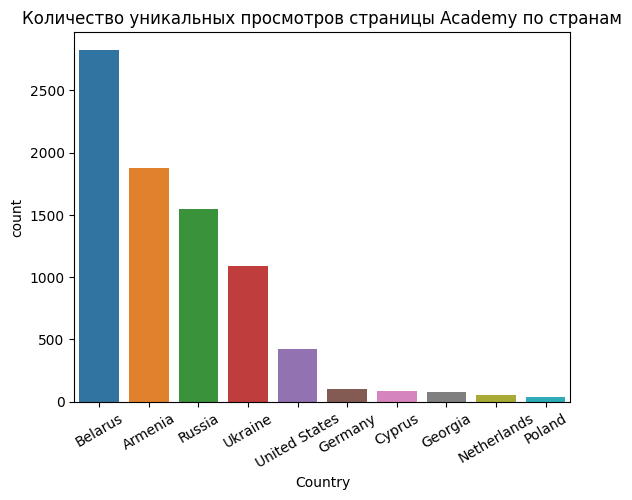

In [13]:
fig = plt.figure()
#ax = fig.add_subplot(111)
ax=sns.countplot(data=academy_landing, x="ga:country",order = academy_landing['ga:country'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
ax.set(title='Количество уникальных просмотров страницы Academy по странам')
ax.set_xlabel("Country")


plt.show()

In [12]:
acc=pd.DataFrame(academy_landing.groupby(['ga:country'])['ga:pageviews'].sum()).sort_values(by='ga:pageviews', ascending=False).reset_index()
acc

,ga:country,ga:pageviews
0,Belarus,7490.0
1,Russia,3479.0
2,Armenia,2809.0
3,Ukraine,2447.0
4,United States,698.0
5,Georgia,499.0
6,Germany,368.0
7,Poland,280.0
8,Cyprus,186.0
9,Netherlands,132.0


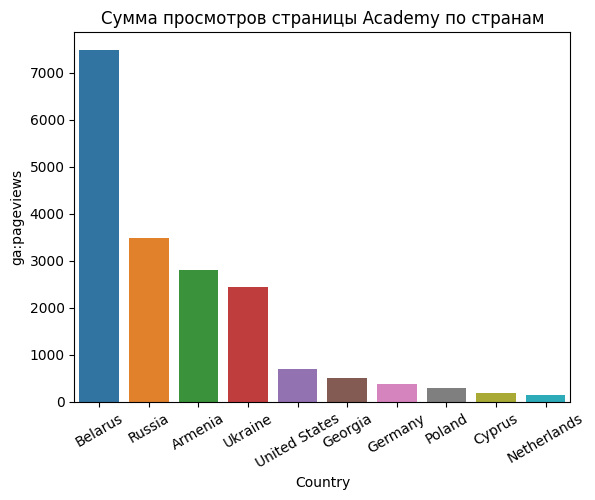

In [14]:
fig = plt.figure()
ax=sns.barplot(data=acc, x="ga:country",y="ga:pageviews")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
ax.set(title='Сумма просмотров страницы Academy по странам')
ax.set_xlabel("Country")


plt.show()